In [2]:
import numpy as np
import pandas as pd
import statistics
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,f1_score,roc_curve,auc,roc_auc_score
import warnings
warnings.simplefilter("ignore", UserWarning)

In [3]:
#Load data
data=pd.read_csv('penguins_train.csv')

#dropping Nan values and Sex attribute 
# data = data.dropna()

# print(data.isnull().sum())

In [4]:
#replacing labels
data['Species']=data['Species'].replace(['Adelie Penguin (Pygoscelis adeliae)','Gentoo penguin (Pygoscelis papua)','Chinstrap penguin (Pygoscelis antarctica)'],[0,1,2])
data['Island']=data['Island'].replace(['Biscoe','Dream','Torgersen'],[0,1,2])
data['Clutch Completion']=data['Clutch Completion'].replace(['Yes','No'],[0,1])
data['Sex']=data['Sex'].replace(['MALE','FEMALE'],[0,1])

In [5]:
#fillinf missing values
for i in data.columns:
    if data[i].dtype=='float64' and i!='Sex':
        data[i].fillna(data[i].mean(), inplace=True)
    else:
        data[i].fillna(data[i].mode(), inplace=True)

data['Sex'].fillna(data['Sex'].mode()[0], inplace=True)

In [6]:
#splitting dataframe 
train,test=train_test_split(data,test_size=0.33)


In [7]:
#Splitting train and test samples in train.csv
x=data.drop('Species',axis=1)
y=data['Species']

#Split train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [8]:
df0= train[(train['Species']==0) | (train['Species']==1)]
df1= train[(train['Species']==1) | (train['Species']==2)]
df2= train[(train['Species']==2) | (train['Species']==0)]

In [9]:
#Splitting train and test samples in train.csv
df0_x=df0.drop('Species',axis=1)
df0_y=df0['Species']

df1_x=df1.drop('Species',axis=1)
df1_y=df1['Species']

df2_x=df2.drop('Species',axis=1)
df2_y=df2['Species']


#Split train and test for each binary classifier
df0x_train,df0x_test,df0y_train,df0y_test=train_test_split(df0_x,df0_y,test_size=0.20)
df1x_train,df1x_test,df1y_train,df1y_test=train_test_split(df1_x,df1_y,test_size=0.20)
df2x_train,df2x_test,df2y_train,df2y_test=train_test_split(df2_x,df2_y,test_size=0.20)



In [10]:
#LogisticRegression

model0=LogisticRegression()
model0.fit(df0x_train,df0y_train)
print(model0.score(df0x_test,df0y_test))

model1=LogisticRegression()
model1.fit(df1x_train,df1y_train)
print(model1.score(df1x_test,df1y_test))

model2=LogisticRegression()
model2.fit(df2x_train,df2y_train)

print(model2.score(df2x_test,df2y_test))

0.9655172413793104
1.0
1.0


In [11]:
#Taking majority by ensembling for multiclass classification
y_pred=[]
pred_prob=[]
for i in range(len(x_test)):
    pred0=model0.predict([x_test.iloc[i,:]])
    pred0_prob=model0.predict_proba([x_test.iloc[i,:]])
    
    pred1=model1.predict([x_test.iloc[i,:]])
    pred1_prob=model1.predict_proba([x_test.iloc[i,:]])
    
    pred2=model2.predict([x_test.iloc[i,:]])
    pred2_prob=model2.predict_proba([x_test.iloc[i,:]])
    
    
    y_pred.append(statistics.mode([pred0[0],pred1[0],pred2[0]]))
    
    
    pred_prob.append([np.mean( np.array([ pred0_prob, pred1_prob, pred2_prob ]), axis=0 )])
    # pred_prob[i]=np.mean( np.array([ pred0_prob, pred1_prob , pred2_prob]), axis=0 )

In [12]:
#accuracy of mulit-class classifier
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

acc=accuracy(y_test, y_pred)
print(acc)

1.0


In [21]:
#prediction labels using penguins_test.csv
test_data=pd.read_csv('penguins_test.csv')

#data-preprocessing
test_data['Island']=test_data['Island'].replace(['Biscoe','Dream','Torgersen'],[0,1,2])
test_data['Clutch Completion']=test_data['Clutch Completion'].replace(['Yes','No'],[0,1])
test_data['Sex']=test_data['Sex'].replace(['MALE','FEMALE'],[0,1])

#fillinf missing values
for i in test_data.columns:
    if test_data[i].dtype=='float64' and i!='Sex':
        test_data[i].fillna(test_data[i].mean(), inplace=True)
    else:
        test_data[i].fillna(test_data[i].mode(), inplace=True)

test_data['Sex'].fillna(test_data['Sex'].mode()[0], inplace=True)

pred_labels=[]

for i in range(len(test_data)):
    pred0=model0.predict([test_data.iloc[i,:]]) 
    pred1=model1.predict([test_data.iloc[i,:]])
    pred2=model2.predict([test_data.iloc[i,:]])
    

    pred_labels.append(statistics.mode([pred0[0],pred1[0],pred2[0]]))
    
    
pred_labels = list(map(str, pred_labels))

for i in range(0, len(pred_labels)):
    if (pred_labels[i] == '0'):
        pred_labels[i] = "Adelie Penguin (Pygoscelis adeliae)"
    elif (pred_labels[i] == '1'):
        pred_labels[i] = "Gentoo penguin (Pygoscelis papua)"
    elif (pred_labels[i]=='2'):
        pred_labels[i] = "Chinstrap penguin (Pygoscelis antarctica)"

#Writing output in a csv file
file=open('output.csv','w+',newline='')
Header=['labels']

#writing data into csv
with file:
    write=csv.writer(file)
    write.writerow(Header) 
    write.writerows(map(lambda x: [x], pred_labels))



In [20]:
#Experiment with various classifiers such as KNN, Decision Trees, Random Forests
print("KNN")
model0=KNeighborsClassifier()
model0.fit(x_train,y_train)
print(model0.score(x_test,y_test))

#Decision Trees
print("\nDecision trees")
model0=tree.DecisionTreeClassifier()
model0.fit(x_train,y_train)
print(model0.score(x_test,y_test))


#Random forest
print("\nrandom forest")
model0=RandomForestClassifier(n_estimators = 100)
model0.fit(x_train,y_train)
prob=model0.predict_proba(x_test)
print(model0.score(x_test,y_test))

KNN
0.8727272727272727

Decision trees
0.9272727272727272

random forest
0.9636363636363636


Which classifier performs the best?<br>
Random forest gives a highes t accuracy of 96% among all classifiers. This seems to perfect model for given dataset

Text(0.5, 1.0, 'confusion matrix')

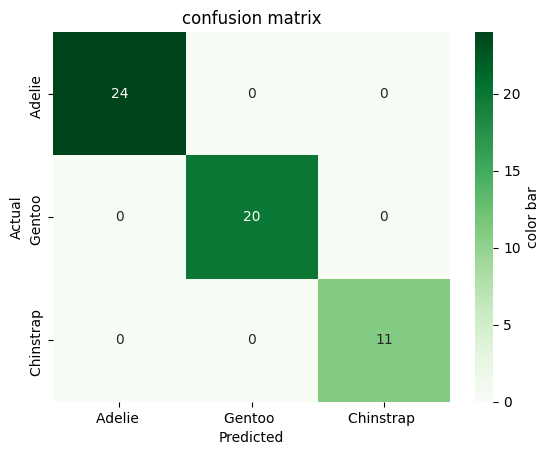

In [19]:
#Plot these three error metrics specific to multi-class classification: confusion
#matrix, F1 score, and ROC AUC score.
#plotiing confusion matrix
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,cmap='Greens',annot=True,
           cbar_kws={"orientation":"vertical","label":"color bar"},
           xticklabels=['Adelie ','Gentoo ','Chinstrap '],yticklabels=['Adelie ','Gentoo ','Chinstrap '])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion matrix')

In [24]:
#f1 score
f1=f1_score(y_test, y_pred,average='micro')
print("F1 score - "+str(f1))
#ROC-curve
score=roc_auc_score(y_test,prob,multi_class='ovr')
print("ROC score - "+str(score))


F1 score - 1.0
ROC score - 0.9970378269498504


Which is the best error metric for this
dataset and why?<br>
confusion matrix is the bes metric for error measurement.